In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
sns.set(style="ticks")

In [3]:
def measure(clf,a,b):
    y_ps = cross_val_predict(clf, a, b, cv=3)
    print(classification_report(b, y_ps))

In [4]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
iris = iris.replace(['setosa','versicolor','virginica'],[0,1,2])
iris.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [6]:
import sklearn.model_selection as ms
rn_train_set, rn_test_set = ms.train_test_split(iris, test_size = 0.1, random_state=42)  

In [7]:
X_train = rn_train_set.drop('species', axis=1)
y_train = rn_train_set.species.copy()

In [8]:
X_test= rn_test_set.drop('species', axis=1)
y_test = rn_test_set.species.copy()

# Randomforest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
x = forest_clf.fit(X_train, y_train)
y = forest_clf.predict(X_train)

In [10]:
measure(forest_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.91      0.93      0.92        44
          2       0.93      0.91      0.92        47

avg / total       0.95      0.95      0.95       135



In [11]:
y_ps = cross_val_predict(forest_clf,X_train,y_train,cv=3)
matrix = confusion_matrix(y_train, y_ps)
matrix

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  4, 43]])

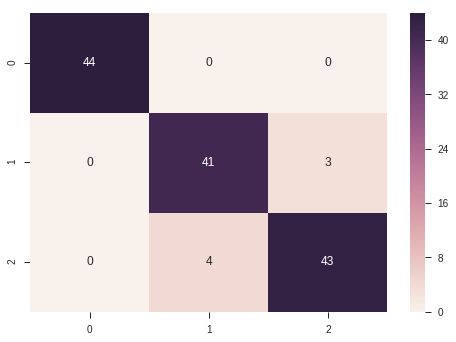

In [12]:
ax = sns.heatmap(matrix, annot=True, fmt="d")

In [13]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.97826087,  0.91304348,  0.95348837])

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [ 20,30,40], 'max_features': [1,2,3,4],'max_depth':[1,2,3,4]},]
rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='neg_mean_squared_error')

x = grid_search.fit(X_train,y_train)

grid_search.best_params_

{'max_depth': 3, 'max_features': 4, 'n_estimators': 20}

In [15]:
rf_clf1 = RandomForestClassifier(random_state=42, **grid_search.best_params_)

In [16]:
cross_val_score(rf_clf1, X_train, y_train, cv=3, scoring='accuracy')

array([ 1.        ,  0.93478261,  0.97674419])

# KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 2)
X = knn_clf.fit(X_train, y_train)
y = knn_clf.predict(X_train)

In [18]:
measure(knn_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.93      0.93        44
          2       0.94      0.94      0.94        47

avg / total       0.96      0.96      0.96       135



In [19]:
y_ps1 = cross_val_predict(knn_clf,X_train,y_train,cv=3)
knn_matrix= confusion_matrix(y_train, y_ps1)
knn_matrix

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  3, 44]])

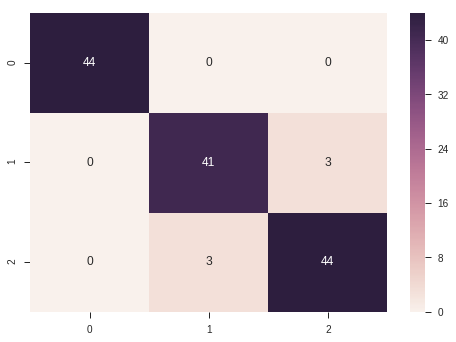

In [20]:
ax = sns.heatmap(knn_matrix, annot=True, fmt="d")

In [21]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.95652174,  0.93478261,  0.97674419])

# Gradient boosting classifier

In [22]:
from sklearn.ensemble import  GradientBoostingClassifier
grb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
X = grb_clf.fit(X_train, y_train)
y = grb_clf.predict(X_train)

In [23]:
measure(grb_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.95      0.93      0.94        44
          2       0.94      0.96      0.95        47

avg / total       0.96      0.96      0.96       135



In [24]:
y_ps2 = cross_val_predict(grb_clf,X_train,y_train,cv=3)
grb_matrix = confusion_matrix(y_train,y_ps2)
grb_matrix

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  2, 45]])

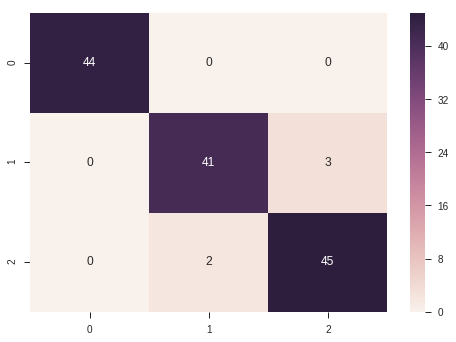

In [25]:
ax = sns.heatmap(grb_matrix, annot=True, fmt="d")

In [26]:
cross_val_score(grb_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 1.        ,  0.93478261,  0.95348837])

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [ 20,30,40], 'max_features': [1,2,3,4],'max_depth':[1,2,3,4],'learning_rate' : [0.1,0.2,0.3,0.4]}]
grb_clf1 = GradientBoostingClassifier()

grid_search = GridSearchCV(grb_clf, param_grid, cv=3, scoring='neg_mean_squared_error',n_jobs = 4)

x = grid_search.fit(X_train,y_train)

grid_search.best_params_

{'learning_rate': 0.4, 'max_depth': 1, 'max_features': 1, 'n_estimators': 30}

In [28]:
grb_clf2 =  GradientBoostingClassifier( ** grid_search.best_params_ )

In [29]:
cross_val_score(grb_clf2, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.97826087,  0.89130435,  0.95348837])

# Naive bayes classifier

In [30]:
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()
X = GNB_clf.fit(X_train, y_train)
y = GNB_clf.predict(X_train)

In [31]:
measure(GNB_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.89      0.91        44
          2       0.90      0.94      0.92        47

avg / total       0.94      0.94      0.94       135



In [32]:
y_ps3 = cross_val_predict(GNB_clf,X_train,y_train,cv=3)
GNB_matrix = confusion_matrix(y_train,y_ps3)
GNB_matrix

array([[44,  0,  0],
       [ 0, 39,  5],
       [ 0,  3, 44]])

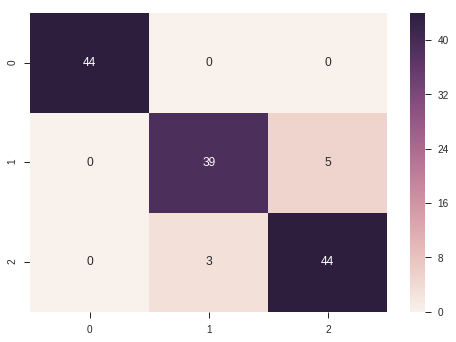

In [33]:
ax = sns.heatmap(GNB_matrix, annot=True, fmt="d")

In [34]:
cross_val_score(GNB_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.95652174,  0.91304348,  0.95348837])

# SVM

In [35]:
from sklearn import svm
svm_clf = svm.SVC()
x = svm_clf.fit(X_train,y_train)
y = svm_clf.predict(X_train)

In [36]:
measure(svm_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.91      0.94        44
          2       0.92      0.98      0.95        47

avg / total       0.96      0.96      0.96       135



In [37]:
y_ps4 = cross_val_predict(svm_clf,X_train,y_train,cv = 3)
svm_matrix = confusion_matrix(y_train,y_ps4)
svm_matrix

array([[44,  0,  0],
       [ 0, 40,  4],
       [ 0,  1, 46]])

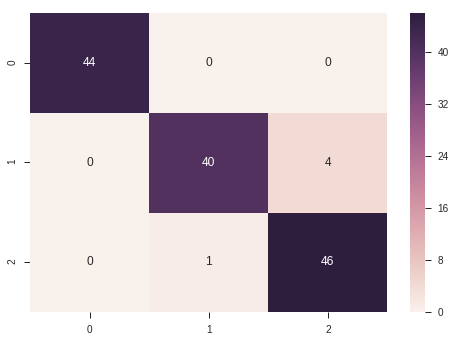

In [38]:
ax = sns.heatmap(svm_matrix, annot=True)

In [39]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 1.        ,  0.91304348,  0.97674419])

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lgt_clf = LogisticRegression()
x = lgt_clf.fit(X_train,y_train)
y = lgt_clf.predict(X_train)

In [41]:
measure(lgt_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       1.00      0.82      0.90        44
          2       0.85      1.00      0.92        47

avg / total       0.95      0.94      0.94       135



In [42]:
y_ps5 = cross_val_predict(lgt_clf,X_train,y_train,cv = 3)
lgt_matrix = confusion_matrix (y_train,y_ps5)
lgt_matrix

array([[44,  0,  0],
       [ 0, 36,  8],
       [ 0,  0, 47]])

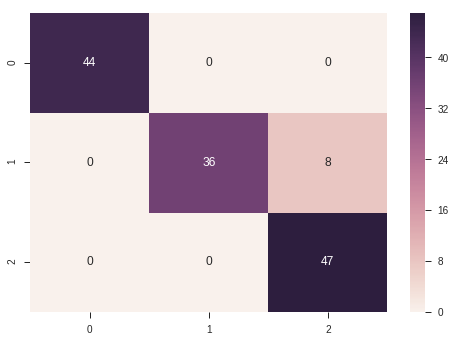

In [43]:
ax = sns.heatmap(lgt_matrix, annot=True, fmt="d")

In [44]:
cross_val_score(lgt_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.93478261,  0.89130435,  1.        ])

# LDA

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
x = lda_clf.fit(X_train,y_train)
y = lda_clf.predict(X_train)

In [46]:
measure(lda_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.95      0.97        44
          2       0.96      0.98      0.97        47

avg / total       0.98      0.98      0.98       135



In [47]:
y_ps6 = cross_val_predict(lda_clf,X_train,y_train,cv = 3)
lda_matrix = confusion_matrix (y_train,y_ps6)
lda_matrix

array([[44,  0,  0],
       [ 0, 42,  2],
       [ 0,  1, 46]])

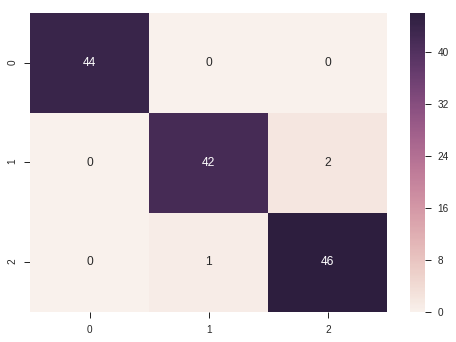

In [48]:
ax = sns.heatmap(lda_matrix, annot=True)

In [49]:
cross_val_score(lda_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.97826087,  0.95652174,  1.        ])

# Neural networks  (Perceptron)

In [50]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron(random_state=42)
x = per_clf.fit(X_train, y_train)
y = per_clf.predict(X_train)

In [51]:
measure(per_clf,X_train,y_train)

             precision    recall  f1-score   support

          0       0.93      0.98      0.96        44
          1       0.77      0.93      0.85        44
          2       1.00      0.77      0.87        47

avg / total       0.90      0.89      0.89       135



In [52]:
y_ps7 = cross_val_predict(per_clf,X_train,y_train,cv = 3)
per_matrix = confusion_matrix (y_train,y_ps7)
per_matrix

array([[43,  1,  0],
       [ 3, 41,  0],
       [ 0, 11, 36]])

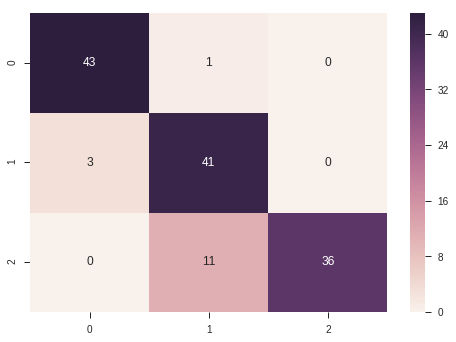

In [53]:
ax = sns.heatmap(per_matrix, annot=True)

In [54]:
cross_val_score(per_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.82608696,  0.89130435,  0.95348837])